In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('fraudTest.csv')

# Explore the dataset (optional)
print(data.head())

# Convert 'trans_date_trans_time' to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract features from the datetime column
data['day'] = data['trans_date_trans_time'].dt.day
data['month'] = data['trans_date_trans_time'].dt.month
data['hour'] = data['trans_date_trans_time'].dt.hour

# Drop the original datetime column and other irrelevant columns if needed
columns_to_drop = ['trans_date_trans_time', 'trans_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob']
data = data.drop(columns=columns_to_drop, axis=1)

# Replace 'is_fraud' with the actual target variable column name
target_variable = 'is_fraud'

# Check if the target variable is in the dataset
if target_variable not in data.columns:
    raise ValueError(f"The target variable '{target_variable}' is not present in the dataset.")

X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Handle missing values in the target variable
y = y.fillna(0)  # You can choose a different strategy based on your data

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can also use 'median' or 'most_frequent'
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can also use 'constant' with fill_value parameter
    ('onehot', OneHotEncoder(drop='first'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessor and classifierS
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)
confusion = confusion_matrix(y_test, predictions)
classification_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report)


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the training dataset
train_data = pd.read_csv('fraudTrain.csv')


# Explore the training dataset
print(train_data.head())
print(train_data.info())
print(train_data.columns)

# Separate features and target variable for training
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [ ]:
# Load the test dataset
test_data = pd.read_csv('fraudTest.csv', on_bad_lines='skip')

# Explore the testing dataset
print(test_data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
# Drop non-essential columns for both training and testing datasets
X_train = train_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
X_test = test_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)


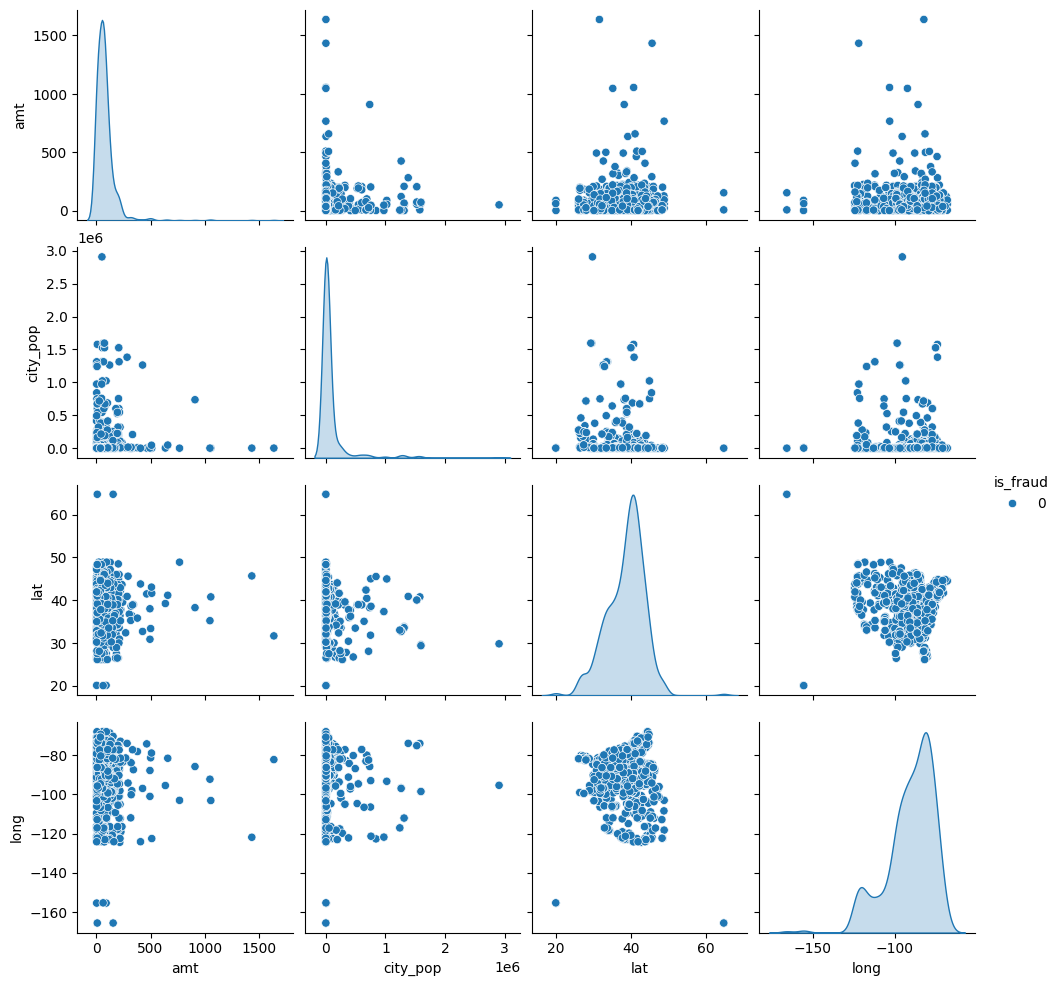

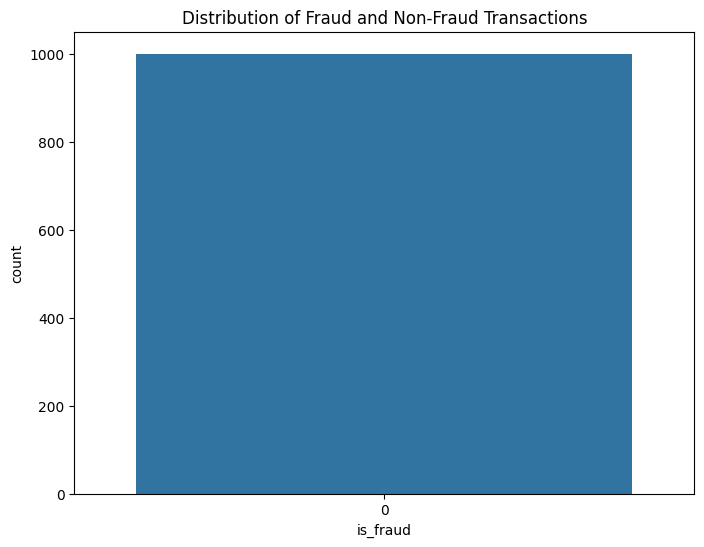

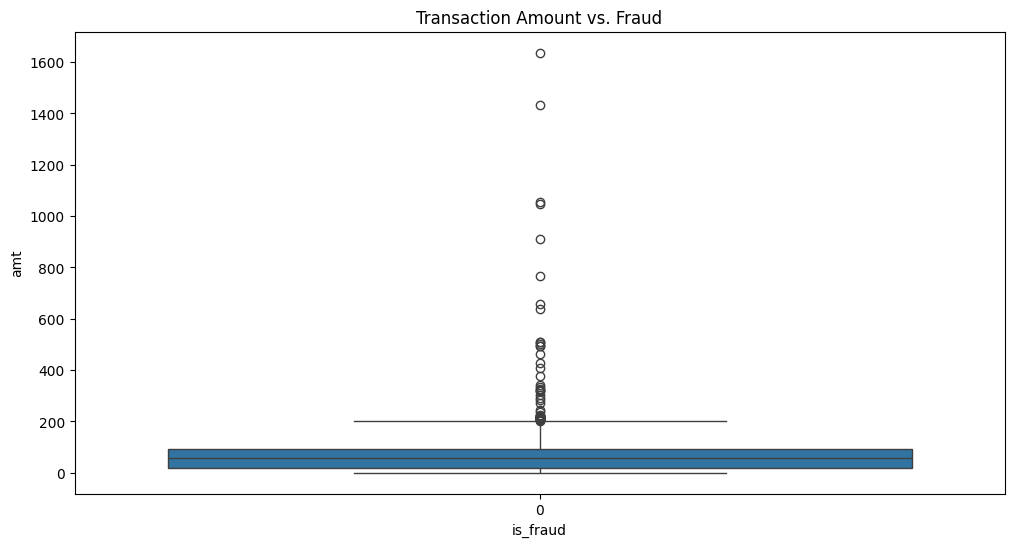

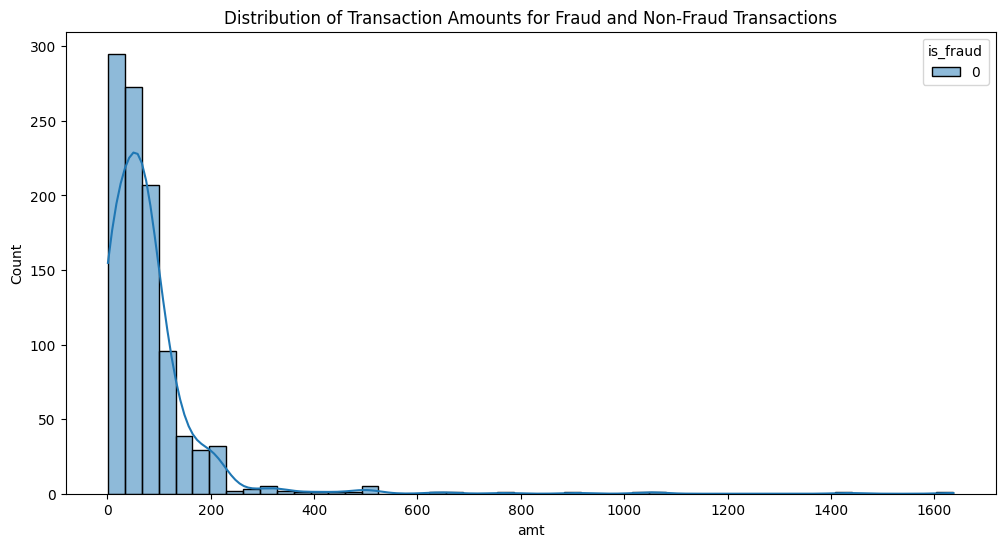

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample of the training dataset
train_data = pd.read_csv('fraudTrain.csv', nrows=1000)

# Basic statistics
sns.pairplot(train_data, hue='is_fraud', vars=['amt', 'city_pop', 'lat', 'long'])
plt.show()

# Distribution of fraud and non-fraud transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

# Relationship between transaction amount and fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.show()

# Distribution of transaction amounts for fraud and non-fraud transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='amt', hue='is_fraud', kde=True, bins=50)
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.show()


CCFRAUD

In [ ]:
import pandas as pd

train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")


In [ ]:
print(train_data.head())
print(test_data.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
#missing values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

In [ ]:
print(train_data.dtypes)
print(test_data.dtypes)
#examine data types

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     obj

In [ ]:
train_data.describe()
test_data.describe()
#Explore distributions and descriptive statistics

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


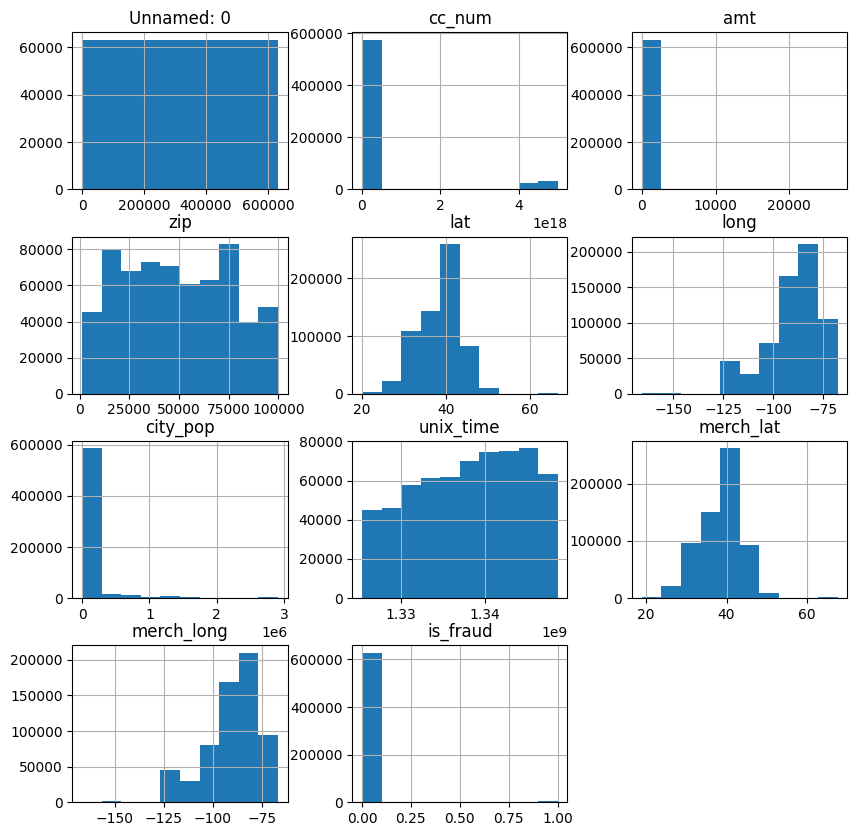

<ipython-input-35-728c61c9e2d4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


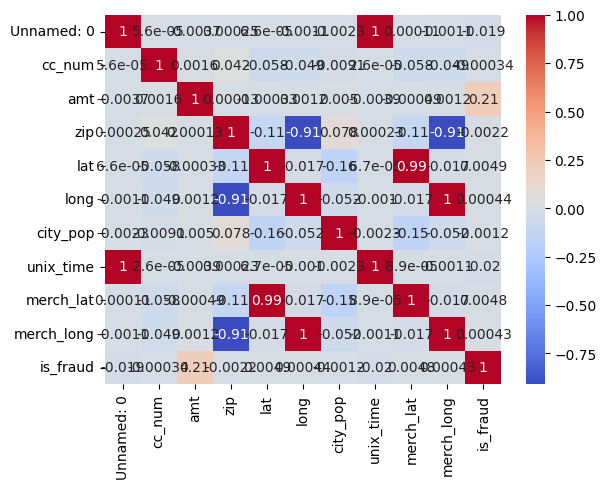

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("fraudTrain.csv")

df.hist(figsize=(10, 10))
plt.show()
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
